## Road Freight in EU

We will pull data from eurostats and clean up the road freight data in EU.

### Install Packages

In [1]:
import pandas as pd
import numpy as np
import missingno as msno

In [82]:
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import seaborn as sns; sns.set()

### Load Data

Goods loaded in reporting country:

`https://ec.europa.eu/eurostat/estat-navtree-portlet-prod/BulkDownloadListing?file=data/road_go_ia7lgtt.tsv.gz`

Good unloaded in reporting country:

`https://ec.europa.eu/eurostat/estat-navtree-portlet-prod/BulkDownloadListing?file=data/road_go_iq_utt.tsv.gz`


In [83]:
source_loaded = "assets/road-freight-eurostats/road_go_ia_ltt.tsv"
source_unloaded = "assets/road-freight-eurostats/road_go_ia_utt.tsv"

In [84]:
df_load = pd.read_csv(source_loaded, sep='[\t|,]', na_values=[': ', ':'])
df_unload = pd.read_csv(source_unloaded, sep='[\t|,]', na_values=[': ', ':'])

/Users/leima/anaconda3/envs/theflow-code/lib/python3.7/site-packages/ipykernel_launcher.py:1: ParserWarning:

Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.

/Users/leima/anaconda3/envs/theflow-code/lib/python3.7/site-packages/ipykernel_launcher.py:2: ParserWarning:

Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.



In [85]:
df_load.sample(10)

,unit,carriage,c_unload,geo\time,2019,2018,2017,2016,2015,2014,...,1991,1990,1989,1988,1987,1986,1985,1984,1983,1982
3917,MIO_TKM,TOT,SI,BE,13.0,1.0,13.0,5.0,6.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
806,MIO_TKM,HIRE,HU,UK,4.0,15.0,0.0,NaN,1.0,0.0,...,28.0,6.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2909,MIO_TKM,TOT,DK,SK,62.0,20.0,31.0,131.0,57.0,45.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1231,MIO_TKM,HIRE,RS,SE,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2522,MIO_TKM,OWN,UA,PT,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3888,MIO_TKM,TOT,SE,BG,107.0,138.0,32.0,NaN,NaN,159.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
99,MIO_TKM,HIRE,BA,NL,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2819,MIO_TKM,TOT,CZ,EL,155.0,64.0,198.0,51.0,86.0,16.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
527,MIO_TKM,HIRE,EU27_2007,HR,2505.0,2488.0,2233.0,2117.0,1899.0,1679.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
290,MIO_TKM,HIRE,DE,SK,2263.0,2309.0,2274.0,2148.0,2162.0,1859.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [86]:
df_unload.sample(10)

,unit,carriage,c_load,geo\time,2019,2018,2017,2016,2015,2014,...,1991,1990,1989,1988,1987,1986,1985,1984,1983,1982
117,MIO_TKM,HIRE,BG,CZ,20.0,NaN,22.0,27.0,24.0,17.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1928,MIO_TKM,OWN,FI,NL,1.0,NaN,0.0,NaN,NaN,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1567,MIO_TKM,OWN,DE,DK,5.0,2.0,6.0,NaN,NaN,1.0,...,86.0,73.0,65.0,67.0,76.0,59.0,47.0,59.0,64.0,66.0
30,MIO_TKM,HIRE,AM,CZ,NaN,NaN,30.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1256,MIO_TKM,HIRE,SI,SK,136.0,155.0,129.0,235.0,83.0,117.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3271,MIO_TKM,TOT,LT,HR,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1623,MIO_TKM,OWN,EA,FR,NaN,NaN,NaN,NaN,NaN,NaN,...,529.0,650.0,1256.0,1239.0,989.0,957.0,944.0,917.0,606.0,658.0
2400,MIO_TKM,OWN,WORLD,SE,132.0,60.0,95.0,70.0,35.0,61.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2194,MIO_TKM,OWN,PT,FR,NaN,68.0,NaN,NaN,NaN,NaN,...,30.0,47.0,36.0,63.0,20.0,11.0,2.0,14.0,15.0,0.0
2039,MIO_TKM,OWN,IT,RO,267.0,229.0,184.0,130.0,85.0,119.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Clean Up 

The meaning of keys are illustrated here:
https://ec.europa.eu/eurostat/cache/metadata/en/road_go_esms.htm



rename columns

In [90]:
df_load.rename(
    columns={
        "geo\\time": "origin",
        "c_unload": "destination"
    },
    inplace=True
)

df_unload.rename(
    columns={
        "geo\\time": "destination",
        "c_load": "origin"
    },
    inplace=True
)

In [91]:
for col in df_load.columns:
    df_load.rename(
        columns={
            col: col.strip()
        },
        inplace=True
    )

for col in df_unload.columns:
    df_unload.rename(
        columns={
            col: col.strip()
        },
        inplace=True
    )


In [92]:
df_load.replace({df_load["2019"].iloc[0], 1000})

,unit,carriage,destination,origin,2019,2018,2017,2016,2015,2014,...,1991,1990,1989,1988,1987,1986,1985,1984,1983,1982
0,MIO_TKM,HIRE,AD,CZ,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,MIO_TKM,HIRE,AD,DE,NaN,3.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,MIO_TKM,HIRE,AD,ES,46.0,54.0,18.0,29.0,68.0,39.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,MIO_TKM,HIRE,AD,FR,2.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,MIO_TKM,HIRE,AD,HU,NaN,NaN,NaN,NaN,5.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4123,MIO_TKM,TOT,WORLD,SE,1255.0,1453.0,1791.0,1658.0,1828.0,1617.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4124,MIO_TKM,TOT,WORLD,SI,5618.0,5661.0,5152.0,4702.0,4771.0,4308.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4125,MIO_TKM,TOT,WORLD,SK,8472.0,8683.0,8290.0,8357.0,7902.0,6942.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4126,MIO_TKM,TOT,WORLD,UK,3073.0,3315.0,3072.0,2959.0,3487.0,3788.0,...,5604.0,5413.0,4519.0,3900.0,3255.0,2110.0,2003.0,2073.0,2037.0,1767.0


<AxesSubplot:>

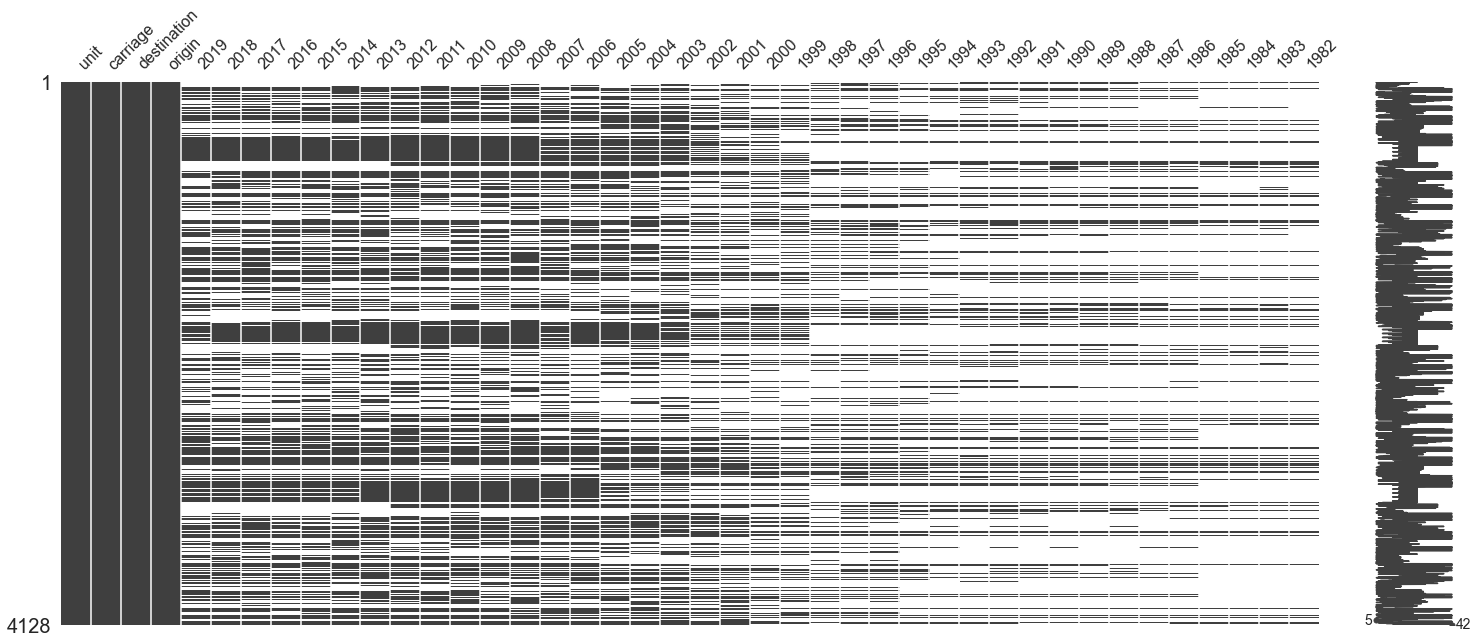

In [93]:
msno.matrix(df_load)

<AxesSubplot:>

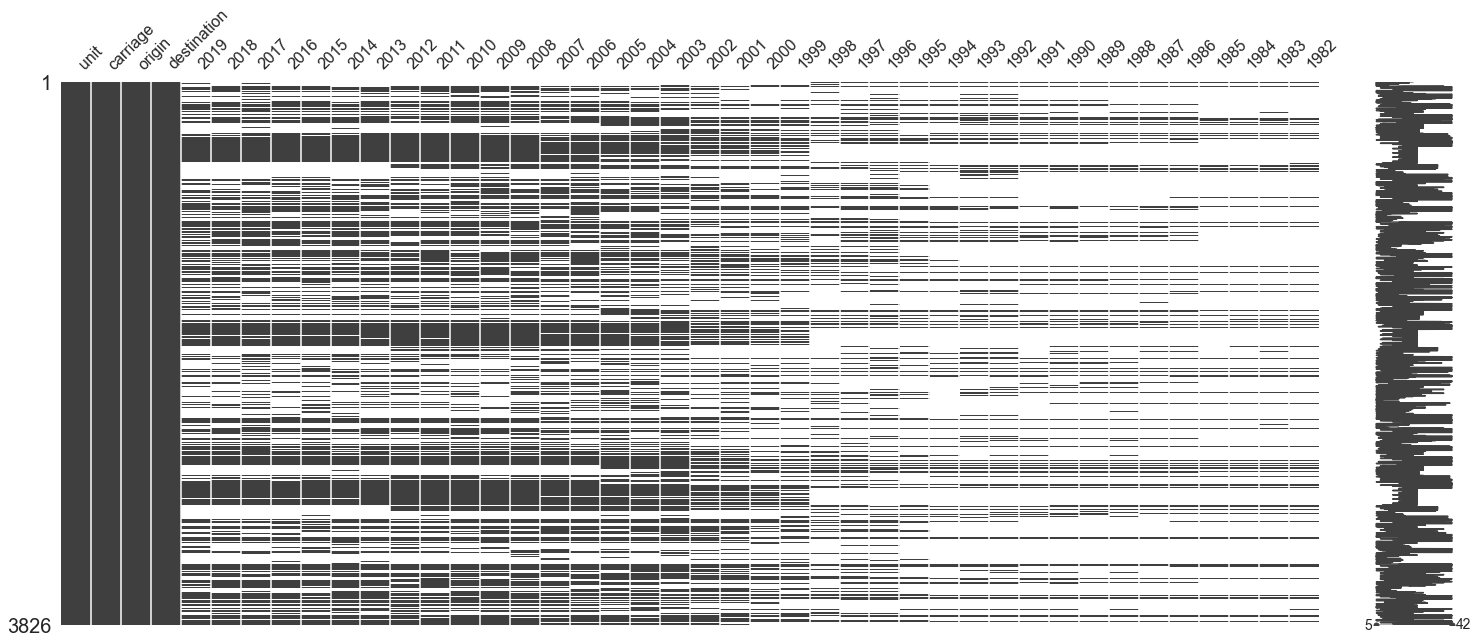

In [94]:
msno.matrix(df_unload)

Here is brief look into the data

In [95]:
df_load.columns

Index(['unit', 'carriage', 'destination', 'origin', '2019', '2018', '2017',
       '2016', '2015', '2014', '2013', '2012', '2011', '2010', '2009', '2008',
       '2007', '2006', '2005', '2004', '2003', '2002', '2001', '2000', '1999',
       '1998', '1997', '1996', '1995', '1994', '1993', '1992', '1991', '1990',
       '1989', '1988', '1987', '1986', '1985', '1984', '1983', '1982'],
      dtype='object')

In [96]:
df_load.unit.unique()

array(['MIO_TKM'], dtype=object)

In [97]:
df_load.carriage.unique()

array(['HIRE', 'NOT_SPEC', 'OWN', 'TOT'], dtype=object)

- `HIRE`: hire or reward
- `OWN`: 

In [98]:
df_load.destination.unique()

array(['AD', 'AF', 'AFR_N', 'AL', 'AM', 'AT', 'AZ', 'BA', 'BE', 'BG',
       'BH', 'BY', 'CH', 'CY', 'CZ', 'CZ_SK', 'DE', 'DK', 'DZ', 'EA',
       'EE', 'EEA_X_LI', 'EG', 'EH', 'EL', 'ES', 'EU15', 'EU25',
       'EU27_2007', 'EU27_2020', 'EU28', 'EUR_OTH', 'EXT_EU15', 'EX_DD',
       'EX_SU', 'EX_YU', 'FI', 'FR', 'GE', 'GI', 'HR', 'HU', 'IE', 'IL',
       'IQ', 'IR', 'IS', 'IT', 'JO', 'KG', 'KZ', 'LB', 'LI', 'LT', 'LU',
       'LV', 'MA', 'MC', 'MD', 'ME', 'MK', 'MN', 'MT', 'NE', 'NL', 'NO',
       'OTH', 'PL', 'PT', 'RO', 'RS', 'RS_ME', 'RU', 'SE', 'SI', 'SK',
       'SL', 'SM', 'SY', 'TJ', 'TM', 'TN', 'TR', 'UA', 'UK', 'UNK', 'US',
       'UZ', 'VA', 'WORLD', 'XK'], dtype=object)

In [99]:
df_load.origin.unique()

array(['CZ', 'DE', 'ES', 'FR', 'HU', 'LU', 'NL', 'PT', 'UK', 'LV', 'DK',
       'EL', 'EU15', 'IE', 'IT', 'AT', 'BE', 'BG', 'CY', 'FI', 'HR', 'RO',
       'SE', 'SI', 'LT', 'PL', 'SK', 'CH', 'EE', 'LI', 'NO'], dtype=object)

For the purpose of demonstration, we will only use part of the data.

- We will only look at 2019
- We will only look at HIRE

In [145]:
lunl_c_origin = [
    i for i in set.intersection(
        set(df_load.origin.unique()), 
        set(df_load.destination.unique())
    ) if len(i) == 2
]

df_load_19 = df_load[['unit', 'carriage', 'destination', 'origin', '2019']]
df_load_19_com = df_load_19.loc[
    (
        df_load_19.carriage == "HIRE"
    ) & (
        df_load_19.destination.isin(lunl_c_origin)
    ) & (
        df_load_19.origin.isin(lunl_c_origin)
    ) 
]
df_load_19_com#.sample(10)

df_load_18 = df_load[['unit', 'carriage', 'destination', 'origin', '2018']]
df_load_18_com = df_load_18.loc[
    (
        df_load_18.carriage == "HIRE"
    ) & (
        df_load_18.destination.isin(lunl_c_origin)
    ) & (
        df_load_18.origin.isin(lunl_c_origin)
    ) 
]
df_load_18_com#.sample(10)

,unit,carriage,destination,origin,2018
48,MIO_TKM,HIRE,AT,BE,85.0
49,MIO_TKM,HIRE,AT,BG,97.0
50,MIO_TKM,HIRE,AT,CH,20.0
51,MIO_TKM,HIRE,AT,CY,0.0
52,MIO_TKM,HIRE,AT,CZ,478.0
...,...,...,...,...,...
1468,MIO_TKM,HIRE,UK,PT,380.0
1469,MIO_TKM,HIRE,UK,RO,371.0
1470,MIO_TKM,HIRE,UK,SE,NaN
1471,MIO_TKM,HIRE,UK,SI,176.0


In [146]:
df_load_19_com

,unit,carriage,destination,origin,2019
48,MIO_TKM,HIRE,AT,BE,53.0
49,MIO_TKM,HIRE,AT,BG,126.0
50,MIO_TKM,HIRE,AT,CH,9.0
51,MIO_TKM,HIRE,AT,CY,0.0
52,MIO_TKM,HIRE,AT,CZ,454.0
...,...,...,...,...,...
1468,MIO_TKM,HIRE,UK,PT,460.0
1469,MIO_TKM,HIRE,UK,RO,211.0
1470,MIO_TKM,HIRE,UK,SE,NaN
1471,MIO_TKM,HIRE,UK,SI,121.0


In [106]:
df_unload_19 = df_unload[['unit', 'carriage', 'origin', 'destination', '2019']]
df_unload_19_com = df_unload_19.loc[
    (
        df_unload_19.carriage == "HIRE"
    ) & (
        df_unload_19.origin.apply(lambda x: len(x)==2)
    )  
]
df_unload_19_com.sample(10)

,unit,carriage,origin,destination,2019
1091,MIO_TKM,HIRE,PT,DE,16.0
708,MIO_TKM,HIRE,GE,RO,NaN
888,MIO_TKM,HIRE,LU,EL,NaN
103,MIO_TKM,HIRE,BE,LU,275.0
990,MIO_TKM,HIRE,NL,BG,12.0
818,MIO_TKM,HIRE,IT,LT,760.0
933,MIO_TKM,HIRE,MA,SK,NaN
791,MIO_TKM,HIRE,IL,CY,NaN
972,MIO_TKM,HIRE,MK,LT,NaN
705,MIO_TKM,HIRE,GE,LT,NaN


In [107]:
df_load_19_com.to_csv("assets/road-freight-eurostats/eurostats_load_19_com.csv")

## Construct the Matrix

In [108]:
df_lunl = df_load_19_com.pivot(index='origin', columns='destination', values='2019')
df_lunl

destination,AT,BE,BG,CH,CY,CZ,DE,DK,EE,EL,...,LV,NL,NO,PL,PT,RO,SE,SI,SK,UK
origin,,,,,,,,,,,,,,,,,,,,,
AT,NaN,55.0,21.0,98.0,NaN,42.0,1404.0,18.0,NaN,31.0,...,NaN,62.0,17.0,10.0,NaN,NaN,45.0,27.0,33.0,36.0
BE,53.0,NaN,15.0,77.0,NaN,11.0,1102.0,23.0,NaN,NaN,...,NaN,807.0,NaN,36.0,31.0,NaN,NaN,5.0,NaN,152.0
BG,126.0,24.0,NaN,NaN,NaN,44.0,382.0,22.0,NaN,461.0,...,NaN,77.0,NaN,144.0,36.0,297.0,107.0,18.0,28.0,45.0
CH,9.0,22.0,NaN,NaN,NaN,NaN,191.0,NaN,NaN,NaN,...,NaN,13.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.0
CY,0.0,0.0,0.0,0.0,NaN,0.0,1.0,2.0,NaN,1.0,...,0.0,1.0,NaN,0.0,0.0,0.0,1.0,NaN,0.0,9.0
CZ,454.0,227.0,24.0,84.0,NaN,NaN,2317.0,58.0,NaN,37.0,...,NaN,304.0,45.0,201.0,26.0,17.0,73.0,33.0,631.0,137.0
DE,2050.0,1981.0,8.0,1752.0,NaN,443.0,NaN,1257.0,NaN,13.0,...,NaN,2741.0,106.0,432.0,306.0,32.0,270.0,25.0,59.0,689.0
DK,47.0,2.0,NaN,3.0,NaN,NaN,344.0,NaN,NaN,NaN,...,NaN,79.0,400.0,45.0,NaN,NaN,643.0,NaN,NaN,65.0
EE,11.0,NaN,NaN,NaN,NaN,NaN,194.0,22.0,NaN,NaN,...,108.0,54.0,15.0,41.0,NaN,NaN,88.0,NaN,NaN,NaN


<AxesSubplot:xlabel='destination', ylabel='origin'>

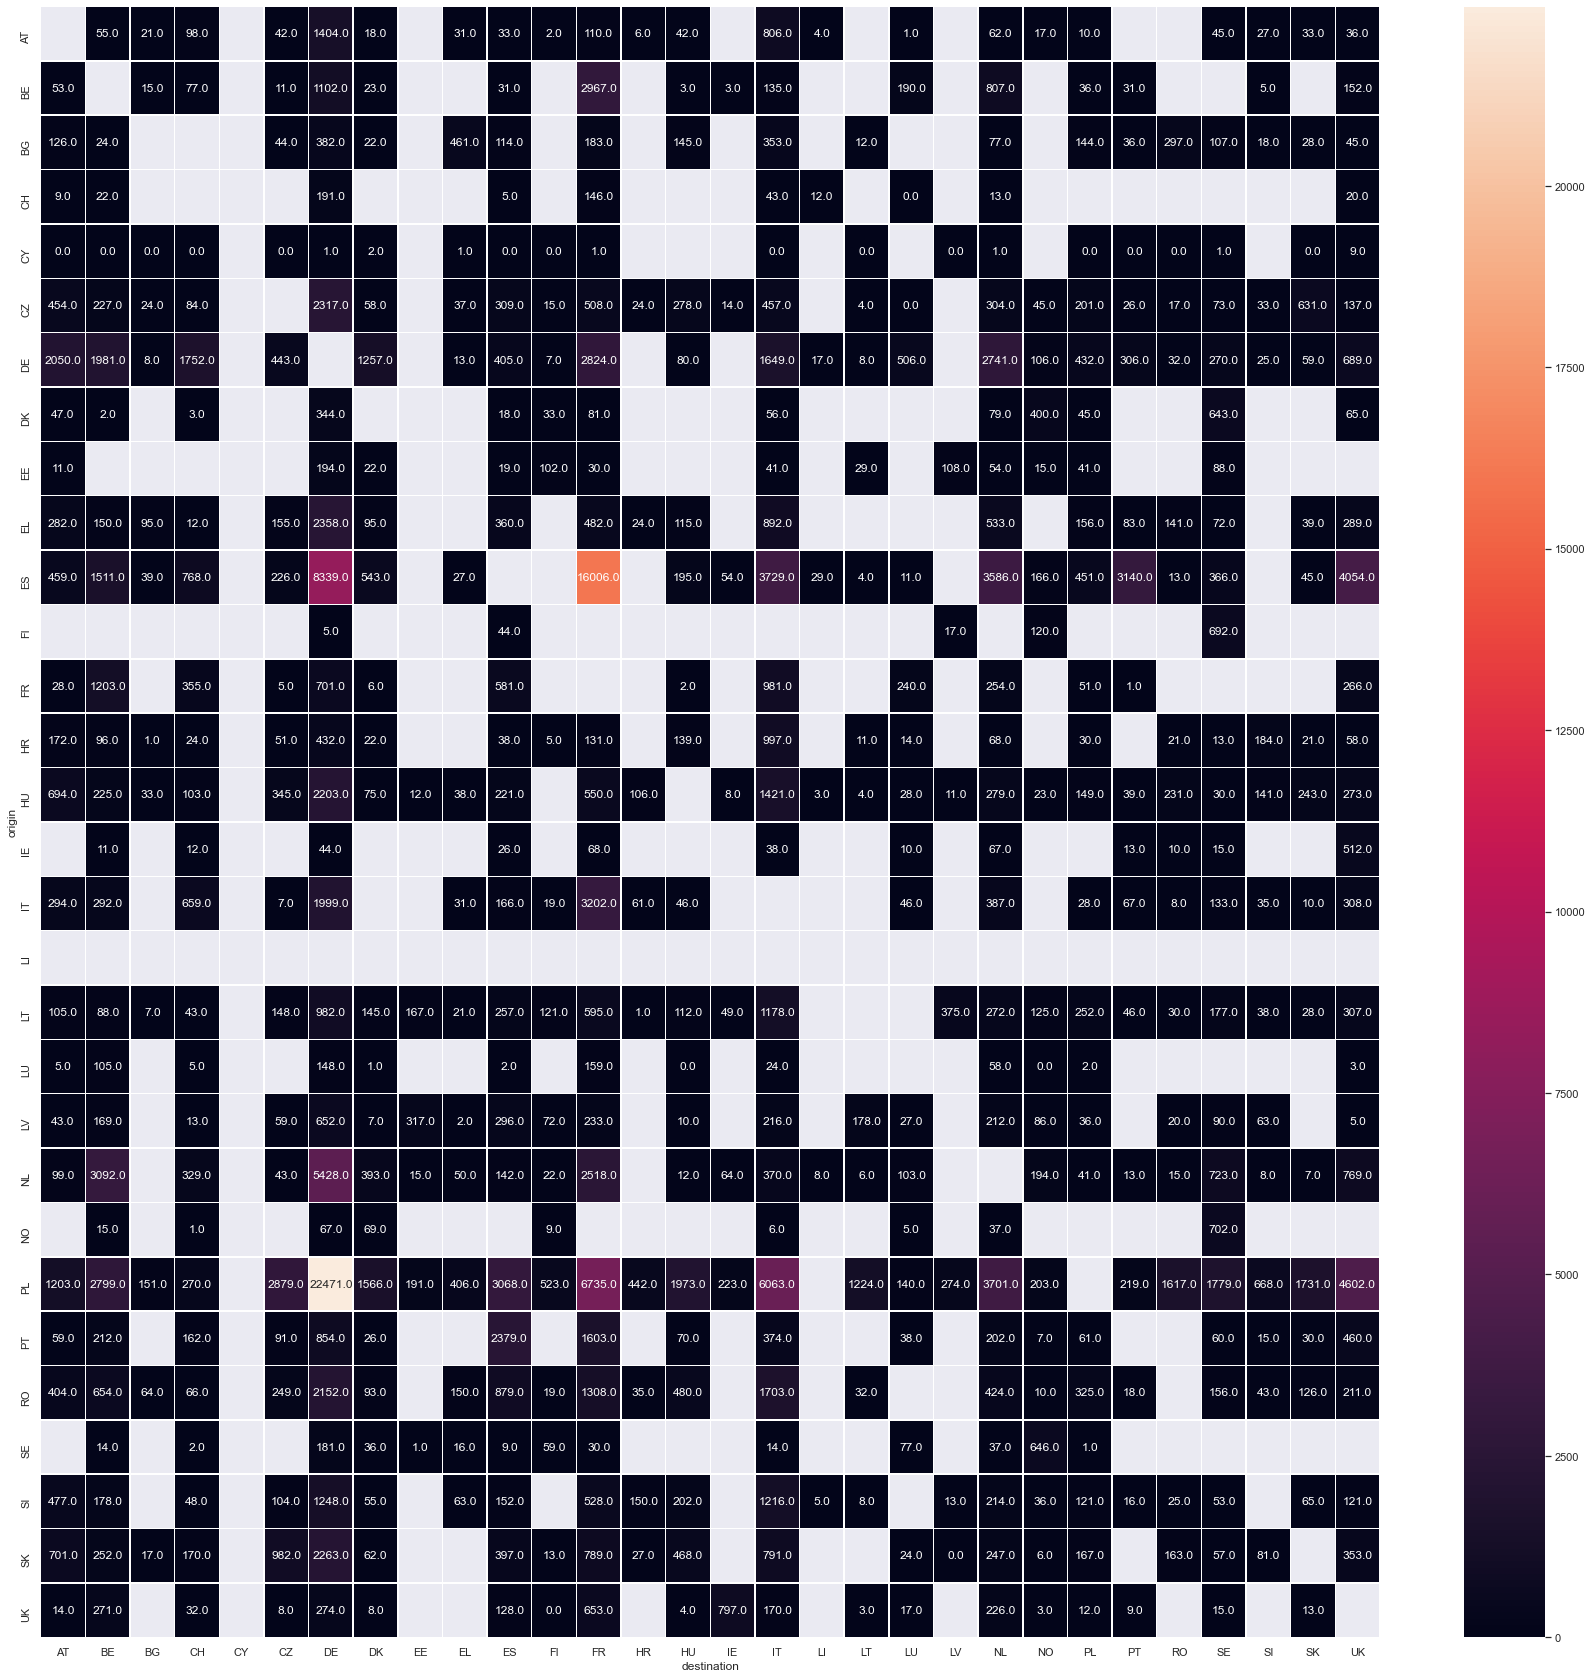

In [109]:


fig, ax = plt.subplots(figsize=(30, 30))

sns.heatmap(
    df_lunl, annot=True, fmt="0.1f", linewidths=.5, ax=ax
)



In [110]:
lunl_minimal = ["DE", "CH", "AT"]
df_lunl_minimal = df_lunl.loc[lunl_minimal, lunl_minimal]
df_lunl_minimal

destination,DE,CH,AT
origin,,,
DE,NaN,1752.0,2050.0
CH,191.0,NaN,9.0
AT,1404.0,98.0,NaN


<AxesSubplot:xlabel='destination', ylabel='origin'>

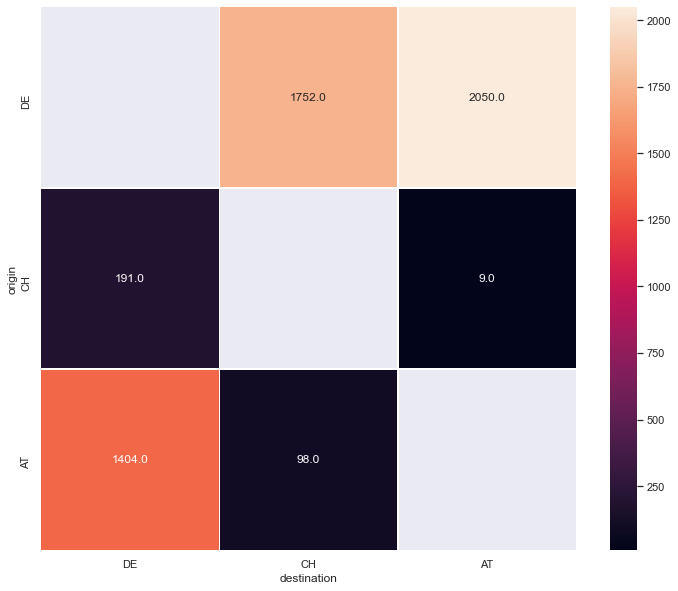

In [111]:
fig, ax = plt.subplots(figsize=(12, 10))

sns.heatmap(
    df_lunl_minimal, annot=True, fmt="0.1f", linewidths=.5, ax=ax
)



## Four Stage Model

In [113]:
df_unload_19_com_minimal = df_unload_19_com.loc[
    (
        df_unload_19_com.origin.isin(lunl_minimal)
    ) & (
        df_unload_19_com.destination.isin(lunl_minimal)
    )
]
df_unload_19_com_minimal

,unit,carriage,origin,destination,2019
34,MIO_TKM,HIRE,AT,CH,24.0
37,MIO_TKM,HIRE,AT,DE,1387.0
156,MIO_TKM,HIRE,CH,AT,45.0
161,MIO_TKM,HIRE,CH,DE,684.0
232,MIO_TKM,HIRE,DE,AT,1405.0
235,MIO_TKM,HIRE,DE,CH,262.0


In [115]:
df_unload_19_com_minimal.groupby("origin").sum()

,2019
origin,
AT,1411.0
CH,729.0
DE,1667.0


In [116]:
df_unload_19_com_minimal.groupby("destination").sum()

,2019
destination,
AT,1450.0
CH,286.0
DE,2071.0


## Solve the Gravity Model

In [120]:
from sympy.solvers import solve
from sympy import Symbol

In [128]:
f12 = Symbol("f12")
f13 = Symbol("f13")
f23 = Symbol("f23")

d1 = 1450 # Symbol("d1")
d2 = 286 # Symbol("d2")
d3 = 2071 # Symbol("d3")

In [131]:
eqns = [
    f12 * d2 + f13 * d3 - 1,
    f12 * d1 + f23 * d3 - 1,
    f13 * d1 + f23 * d2 - 1
]
sols = solve(eqns, f12, f13, f23, dict=True)
sols

[{f12: -67/165880, f13: 647/1201180, f23: 907/1184612}]

Define the model

In [138]:
float(sols[0][f12])

-0.000403906438389197

In [143]:
def gravity_model(coef_o_d, op, dq, all_coeff):
    
    g = float(all_coeff[coef_o_d] * op * dq)
    
    return g
    
    

In [144]:
gravity_model(f12, 1411.0, 286.0, sols[0])

-162.9948275862069